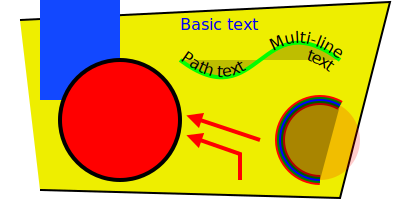

In [38]:
import drawsvg as draw

d = draw.Drawing(200, 100, origin='center')

# Draw an irregular polygon
d.append(draw.Lines(-80, 45,
                     70, 49,
                     95, -49,
                    -90, -40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80, -50, 40, 50, fill='#1248ff')
r.append_title("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, 10, 30,
        fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime', fill='black', fill_opacity=0.2)
p.M(-10, -20)  # Start path at point (-10, -20)
p.C(30, 10, 30, -50, 70, -20)  # Draw a curve to (70, -20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, -35, fill='blue'))  # 8pt text at (-10, -35)
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', line_height=1))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end', center=True))

# Draw multiple circular arcs
d.append(draw.ArcLine(60, 20, 20, 60, 270,
        stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60, 20, 20, 90, -60, cw=True,
        stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60, 20, 20, -60, 90, cw=False,
        stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.51, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, 0.5, -0.1, -0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
        marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, 40).L(20, 27).L(0, 20)  # Chain multiple path commands
d.append(p)
d.append(draw.Line(30, 20, 0, 10,
        stroke='red', stroke_width=2, fill='none',
        marker_end=arrow))  # Add an arrow to the end of a line

d.set_pixel_scale(2)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG

[0, 1.7320508075688767, -1.7320508075688783]
[(50, 0), (25.000000000000007, 43.301270189221924), (24.99999999999999, -43.30127018922194)]
[(50, 0), (25.000000000000007, 43.301270189221924), (-24.99999999999999, 43.30127018922194), (-50, 0), (-25.000000000000007, -43.301270189221924), (24.99999999999999, -43.30127018922194)]
[0, 1.7320508075688767, -1.7320508075688783]
[(50, 0), (25.000000000000007, 43.301270189221924), (24.99999999999999, -43.30127018922194)]
[(150, 0), (125.0, 43.301270189221924), (75.00000000000001, 43.30127018922194), (50, 0), (75.0, -43.301270189221924), (124.99999999999999, -43.30127018922194)]
[0, 1.7320508075688767, -1.7320508075688783]
[(50, 0), (25.000000000000007, 43.301270189221924), (24.99999999999999, -43.30127018922194)]
[(250, 0), (225.0, 43.301270189221924), (175.0, 43.30127018922194), (150, 0), (175.0, -43.301270189221924), (225.0, -43.30127018922194)]
[0, 1.7320508075688767, -1.7320508075688783]
[(50, 0), (25.000000000000007, 43.301270189221924), (24.

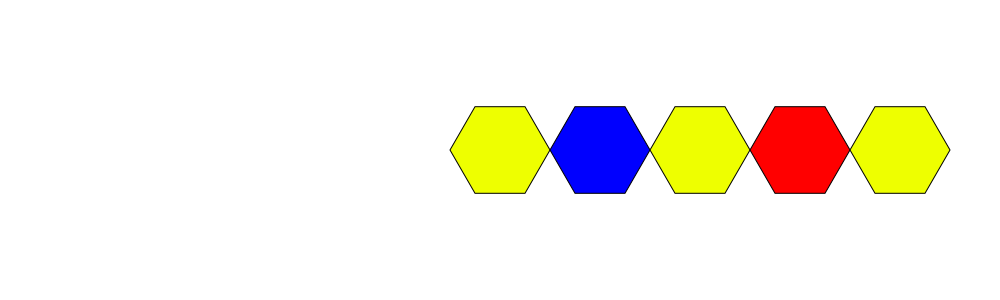

In [2]:
import math
import itertools
import drawsvg as draw
d = draw.Drawing(1000, 300, origin="center")



## the below is terrible code, but I guess it was fun trying to figure it out before
## I realized trigonometry was a far more useful and more succinct tool than trying 
## create a hexagon based on line equations

def hexagon(center: tuple = (0,0), radius: int = 5, color: str = "#eeff00"):
    # we can calculate the six points of a hexagon as the six intersections of the six spokes
    # with a circle centered on the center of the hexagon.
    # we calculate these intersection points assuming center is (0,0), 
    # and then translate the points by the (x,y) amount at the end
    # given by the actual center.
    # NOTE: This formula is based on cartesian coordinates (i.e. y increases upward, whereas in svg y increases 
    # downward). So later on we flip the sign on the y coordinates for each point so that the 
    # order of the points is in the correct order for the hexagon to draw correctly
    
    # since we're assuming center is (0,0), formula of all spokes is y=mx (y intercept is zero)
    points = [] # six points of hexagon -> order: east, southeast, southwest, west, northwest, northeast
    slopes = [] # 3 slopes -> east, southeast, southwest (since a hexagon's six spokes can be seen
                # as three intersecting lines, we only need three slopes)
    radian60 = math.radians(60) # angle between spokes of hexagon
    tan60 = math.tan(radian60)
    
    # we already know the east line slope m1 is zero since it is horizontal.
    slopes.append(0)
    # and we already know the intersection point of the east line is along the x axis at radius distance
    points.append((radius, 0,))
    
    # calculating the unknown slope is based on the formula tan(angle) = (m2-m1)/(1+m1m2)
    for i in range(2):
        m1 = slopes[i]
        m2 = (m1+tan60)/(1-(tan60*m1))
        slopes.append(m2)
        
    
    
    print(slopes)
    
    # now that we know the slope of each line, calculate the southeast and southwest points
    # as intersection between the corresponding spokes and the circle of given radius centered 
    # on the hexagon's center
    # formula for circle centered at (0,0) : x^2 + y^2 = radius^2
    # x and y formulas are obtained by substituting y=mx and x=m/y in the above formula
    
    for i in range(1,3):
        m = slopes[i]
        x = radius/math.sqrt(1+m**2)
        y = (m*radius)/math.sqrt(1+m**2) 
      
        points.append((x,y,))
        
    print(points)
    
    # Now that we have three points, the other three are just the symmetric opposite
    for i in range(3):
        x = -points[i][0]
        y = -points[i][1]
        points.append((x,y,))
        
    # swapping points 2 and 5 because that's the ordering needed for proper hexagon
    points[2], points[5] = points[5], points[2]
        
    # translate each of the points by the actual center of the hexagon
    for i in range(6):
        points[i] = (points[i][0]+center[0], points[i][1]+center[1])
        
    print(points)  
    # unpack the x,y pairs into a single list
    points_flattened = itertools.chain(*points) 

    # create the svg object
    return draw.Lines(*points_flattened,
                    close=True,
            fill=color,
            stroke='black')
        
    
d.append(hexagon(radius=50))
d.append(hexagon(center=(100,0), radius=50, color="#0000ff"))
d.append(hexagon(center=(200,0), radius=50))
d.append(hexagon(center=(300,0), radius=50, color="#ff0000"))
d.append(hexagon(center=(400,0), radius=50))
d
    
    

[(-24.999999999999996, -43.30127018922193), (24.999999999999996, -43.30127018922193), (50.0, -7.105427357601002e-15), (25.000000000000014, 43.301270189221924), (-24.99999999999998, 43.30127018922193), (-50.0, 2.1316282072803006e-14)]
[(87.05904774487396, -48.29629131445341), (112.94095225512604, -48.29629131445341), (135.35533905932738, -35.35533905932738), (148.2962913144534, -12.940952255126042), (148.2962913144534, 12.940952255126032), (135.35533905932738, 35.35533905932737), (112.94095225512605, 48.29629131445341), (87.05904774487398, 48.29629131445341), (64.64466094067264, 35.355339059327385), (51.70370868554659, 12.940952255126057), (51.70370868554658, -12.940952255126017), (64.6446609406726, -35.35533905932736)]


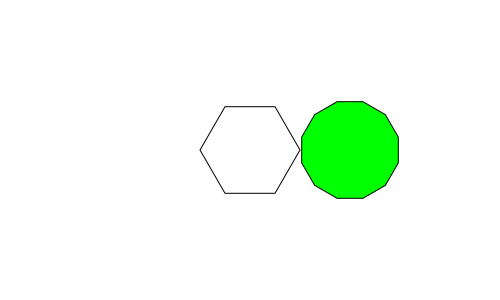

In [12]:
import math
import itertools
import drawsvg as draw

def regular_polygon(center=(0,0), radius=50, sides=6, color="#ffffff"):
    points = []
    # calculate length of polygon side given radius
    side_length = 2*radius*math.sin(math.pi/sides)
    # calculate apothem given the side length
    apothem = side_length/(2*math.tan(math.pi/sides))
    
    points.append((center[0]-(side_length/2), center[1]-apothem))
    
    # angle between spokes
    angle = 2 * math.pi/sides
    
    for pdx in range(sides-1):
        ang = angle*pdx
        _x = math.cos(ang) * side_length
        _y = math.sin(ang) * side_length
        points.append((points[-1][0]+_x, points[-1][1]+_y))
    
    print(points)  
    points_flattened = itertools.chain(*points)
    
    # create the svg object
    return draw.Lines(*points_flattened,
                    close=True,
            fill=color,
            stroke='black')

  #  lines = []
    
    
   # for p0, p1 in zip(points[:-1], points[1:]):
   #     lines.append((*p0, *p1))
  #  print(lines)
    
        
d = draw.Drawing(500, 300, origin="center")    

d.append(regular_polygon())
d.append(regular_polygon(center=(100,0), radius=50, sides=12, color="#00ff00"))
d

def tiling_polygons():
    pass